In [8]:
import torch
from solver.solver import Solver
from models.cnn_transformer import get_resnet_transformer
from models.resnet101_3d_cnn import get_resnet101_3d
from webcam_capturing.DetectorDatasetLoader import GestureDataset
from torch.utils.data import DataLoader
from models.utils import count_trainable_parameters, show_training
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
import os
import numpy as np
import json
from webcam_capturing.ResNetL import resnetl10

import torch.nn.functional as F

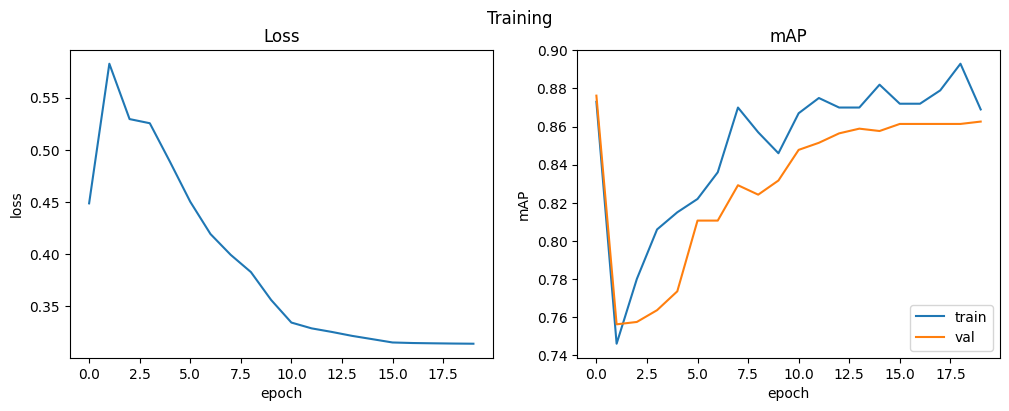

In [9]:
file_name = os.path.join(".", "detector_results", "detector.json")
with open(file_name, "r") as file:
    results = json.load(file)

show_training(results)

In [10]:
annot_train = os.path.join("D:", "IPN_Hand","annotations-20231128T085307Z-001", "annotations", "Annot_TrainList.txt")
annot_test = os.path.join("D:", "IPN_Hand","annotations-20231128T085307Z-001", "annotations", "Annot_TestList.txt")
hdf5_path = os.path.join("D:", "IPN_Hand", "hand_gestures.h5")

In [11]:
model_path = os.path.join(".", "detector_results", "resnetl_detector.pth")

In [12]:
model = resnetl10(num_classes = 2, sample_size = 128, sample_duration=60)

In [13]:
count_trainable_parameters(model)

913650

In [14]:
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [15]:
transform = transforms.Compose([
                transforms.ToTensor()
            ])
dataset = GestureDataset(hdf5_path, annot_test, transform, sample_duration=60)

In [16]:
label = dataset[1][1]

In [17]:
label

1

In [18]:
video = dataset[1][0]

In [19]:
video.shape

torch.Size([60, 3, 128, 128])

In [20]:
video_batch = video.unsqueeze(0).permute(0, 2, 1, 3, 4)


In [21]:
video_batch.shape

torch.Size([1, 3, 60, 128, 128])

In [22]:
output = model(video_batch)

In [23]:
output.shape

torch.Size([1, 2])

In [24]:
output

tensor([[-1.0687,  1.1612]], grad_fn=<AddmmBackward0>)

In [25]:
probs = F.softmax(output, dim=1)

In [26]:
probs

tensor([[0.0971, 0.9029]], grad_fn=<SoftmaxBackward0>)

In [27]:
index_of_correct_label = torch.argmax(probs, dim=1)

In [28]:
index_of_correct_label.item()

1

In [29]:
our_label = label

In [30]:
our_label

1

## Just to be clear

-   0 stands for no gestures
-   1 stands for gestures
